## Suposiciones
Relación lineal

Normalidad

No multicolinealidad

No auto-correlación

Varianzas iguales

## 01) Entendimiento del problema


In [4]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

## 02)Recoleccion de datos

In [7]:
url = 'https://raw.githubusercontent.com/juan-a-vac/Boston-House/main/BostonHousing.csv'
casas = pd.read_csv(url)
casas.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
casas.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- CRIM: Tasa de criminalidad per cápita por ciudad
- ZN: Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados.
- INDUS: Proporción de acres de negocios no minoristas por ciudad.
- CHAS: Variable ficticia de Charles River (1 si la zona limita con el río; 0 en caso contrario)
- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)
- RM: Número promedio de habitaciones por vivienda
- AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS: Distancias ponderadas a cinco centros de empleo en Boston
- RAD: Índice de accesibilidad a autopistas radiales
- TAX: Tasa de impuesto a la propiedad de valor total por cada $10,000
- PTRATIO: Relación entre alumnos y profesores por ciudad
- B: 1000(Bk - 0.63)^2 donde Bk es la proporción de población afroamericana por ciudad
- LSTAT: % de estatus social bajo de la población
- MEDV: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)


analizaremos los precios de las casas teniendo en cuenta el numero de habitaciones de las mismas, para esto usaremos una regresion lineal simple de el precio de la casa respecto a las habitaciones, es de esperar, que a mayor cantidad de habitaciones, la casa tenga un precio mayor.

In [6]:
 #seleccionamos la columna 5 del dataset, correspondiente al numero de habitaciones (nuestra variable independiente)
X = casas["rm"].values.reshape((-1,1))
# seleccionamos nuestra variabl dependiente
y = casas['medv'].values.reshape((-1,1))

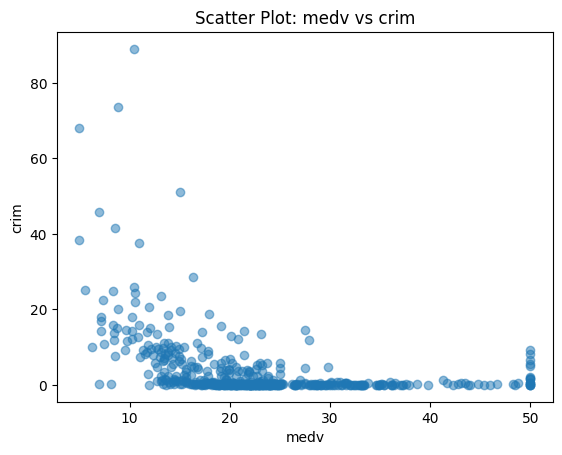

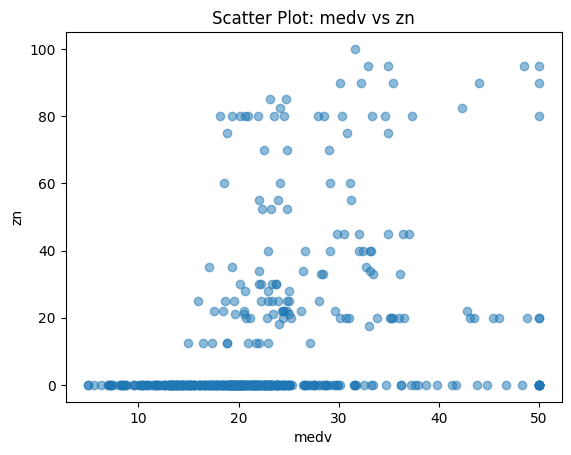

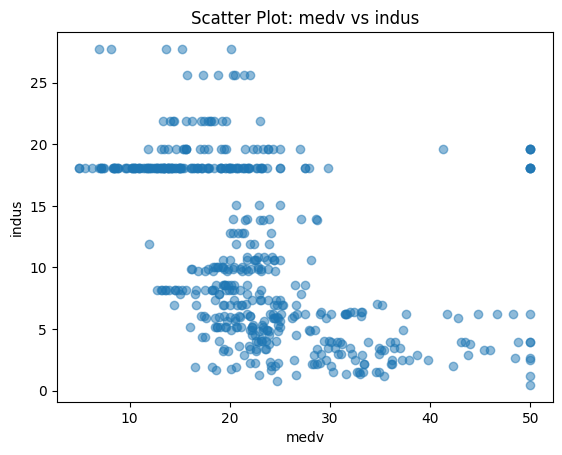

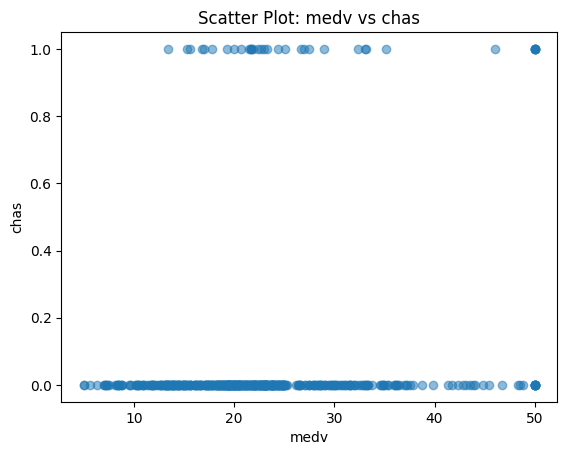

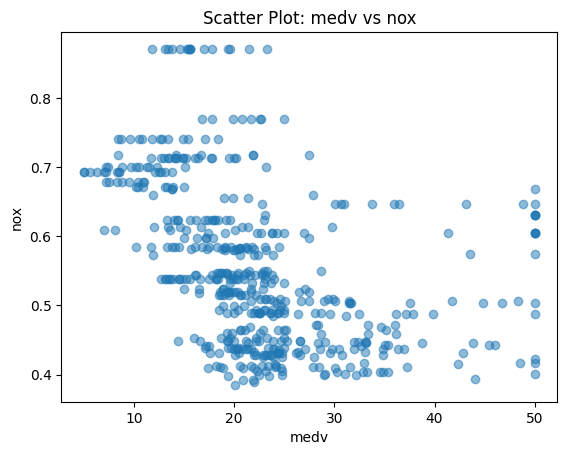

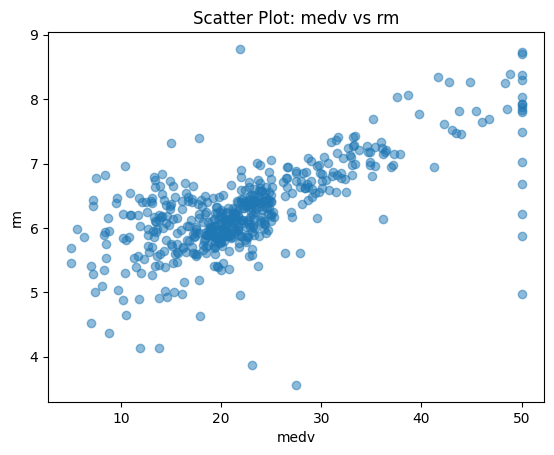

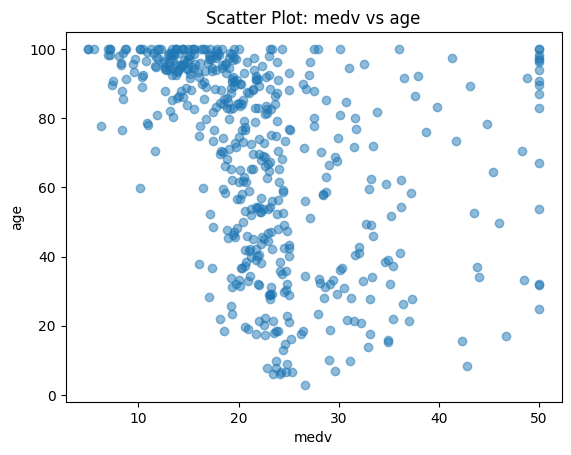

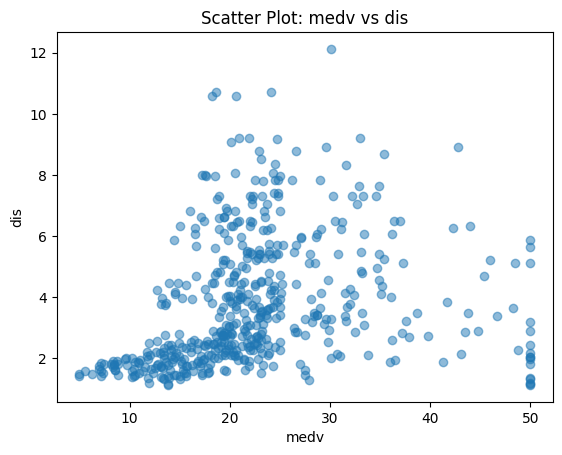

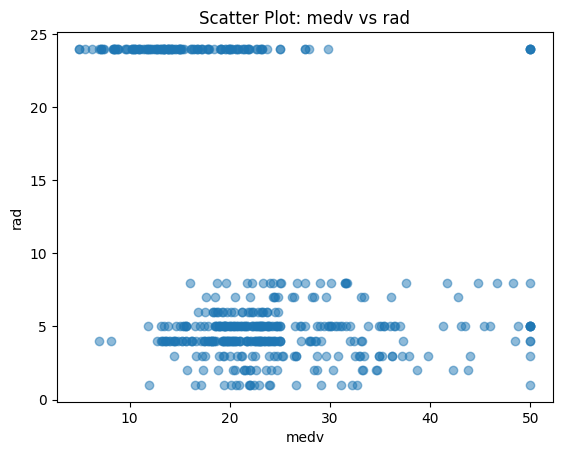

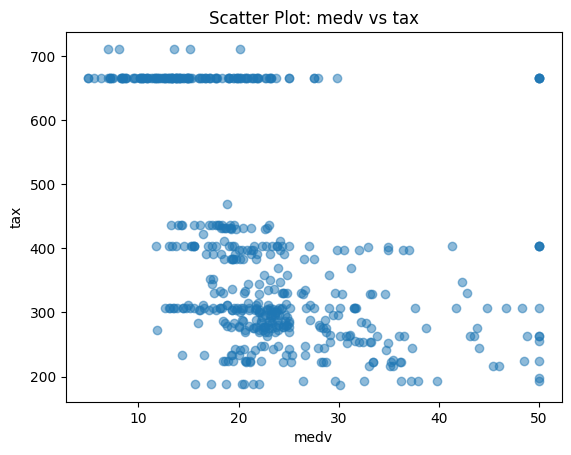

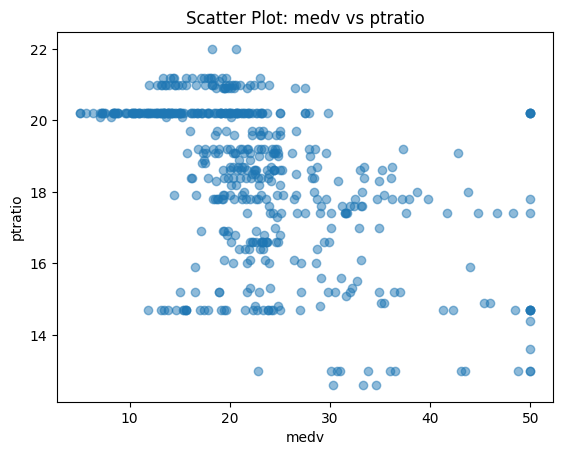

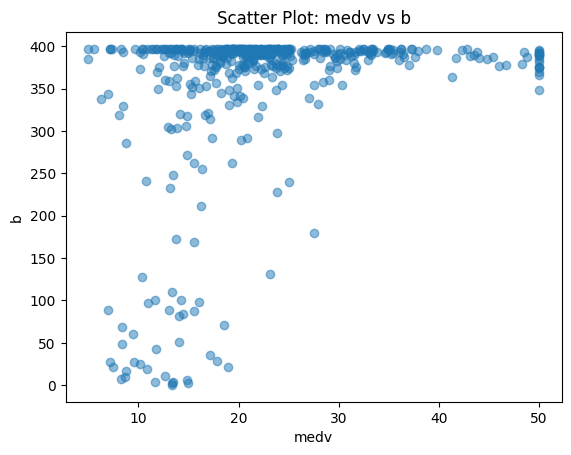

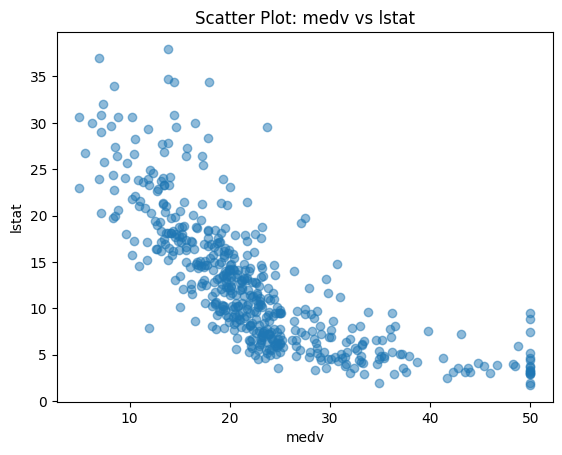

In [31]:
# Elegir la columna especial
columna_elegida = 'medv'

# Obtener una lista de todas las columnas excepto la columna especial
columnas_variables = casas.columns[casas.columns != columna_elegida]

# Iterar a través de las columnas variables
for variable in columnas_variables:
    plt.scatter(casas[columna_elegida],casas[variable], alpha=0.5)
    plt.xlabel(columna_elegida)
    plt.ylabel(variable)
    plt.title(f'Scatter Plot: {columna_elegida} vs {variable}')
    plt.show()

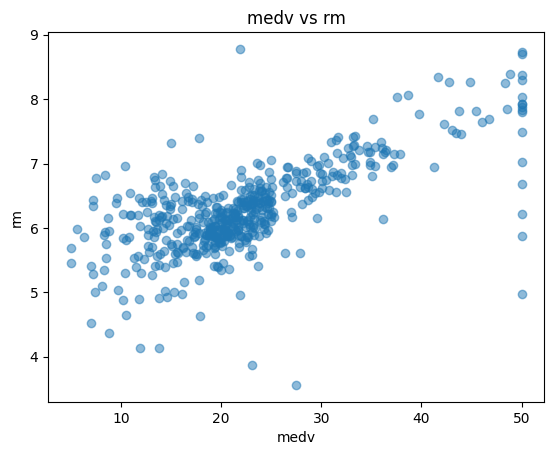

In [9]:
#el grafico que mas nos intereza es la siguiente

plt.scatter(casas['medv'],casas['rm'], alpha=0.5)
plt.xlabel('medv')
plt.ylabel('rm')
plt.title('medv vs rm')
plt.show()

In [ ]:
plt.boxplot(casas())

vamos a tener que quitar algunos outliers para mejorar el modelo

Las variables que se relacionan linealmente estan dadas por medv vs rm, es decir, el precio de las casas se relaciona con la cantidad de habitacioens que poseen estas.

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

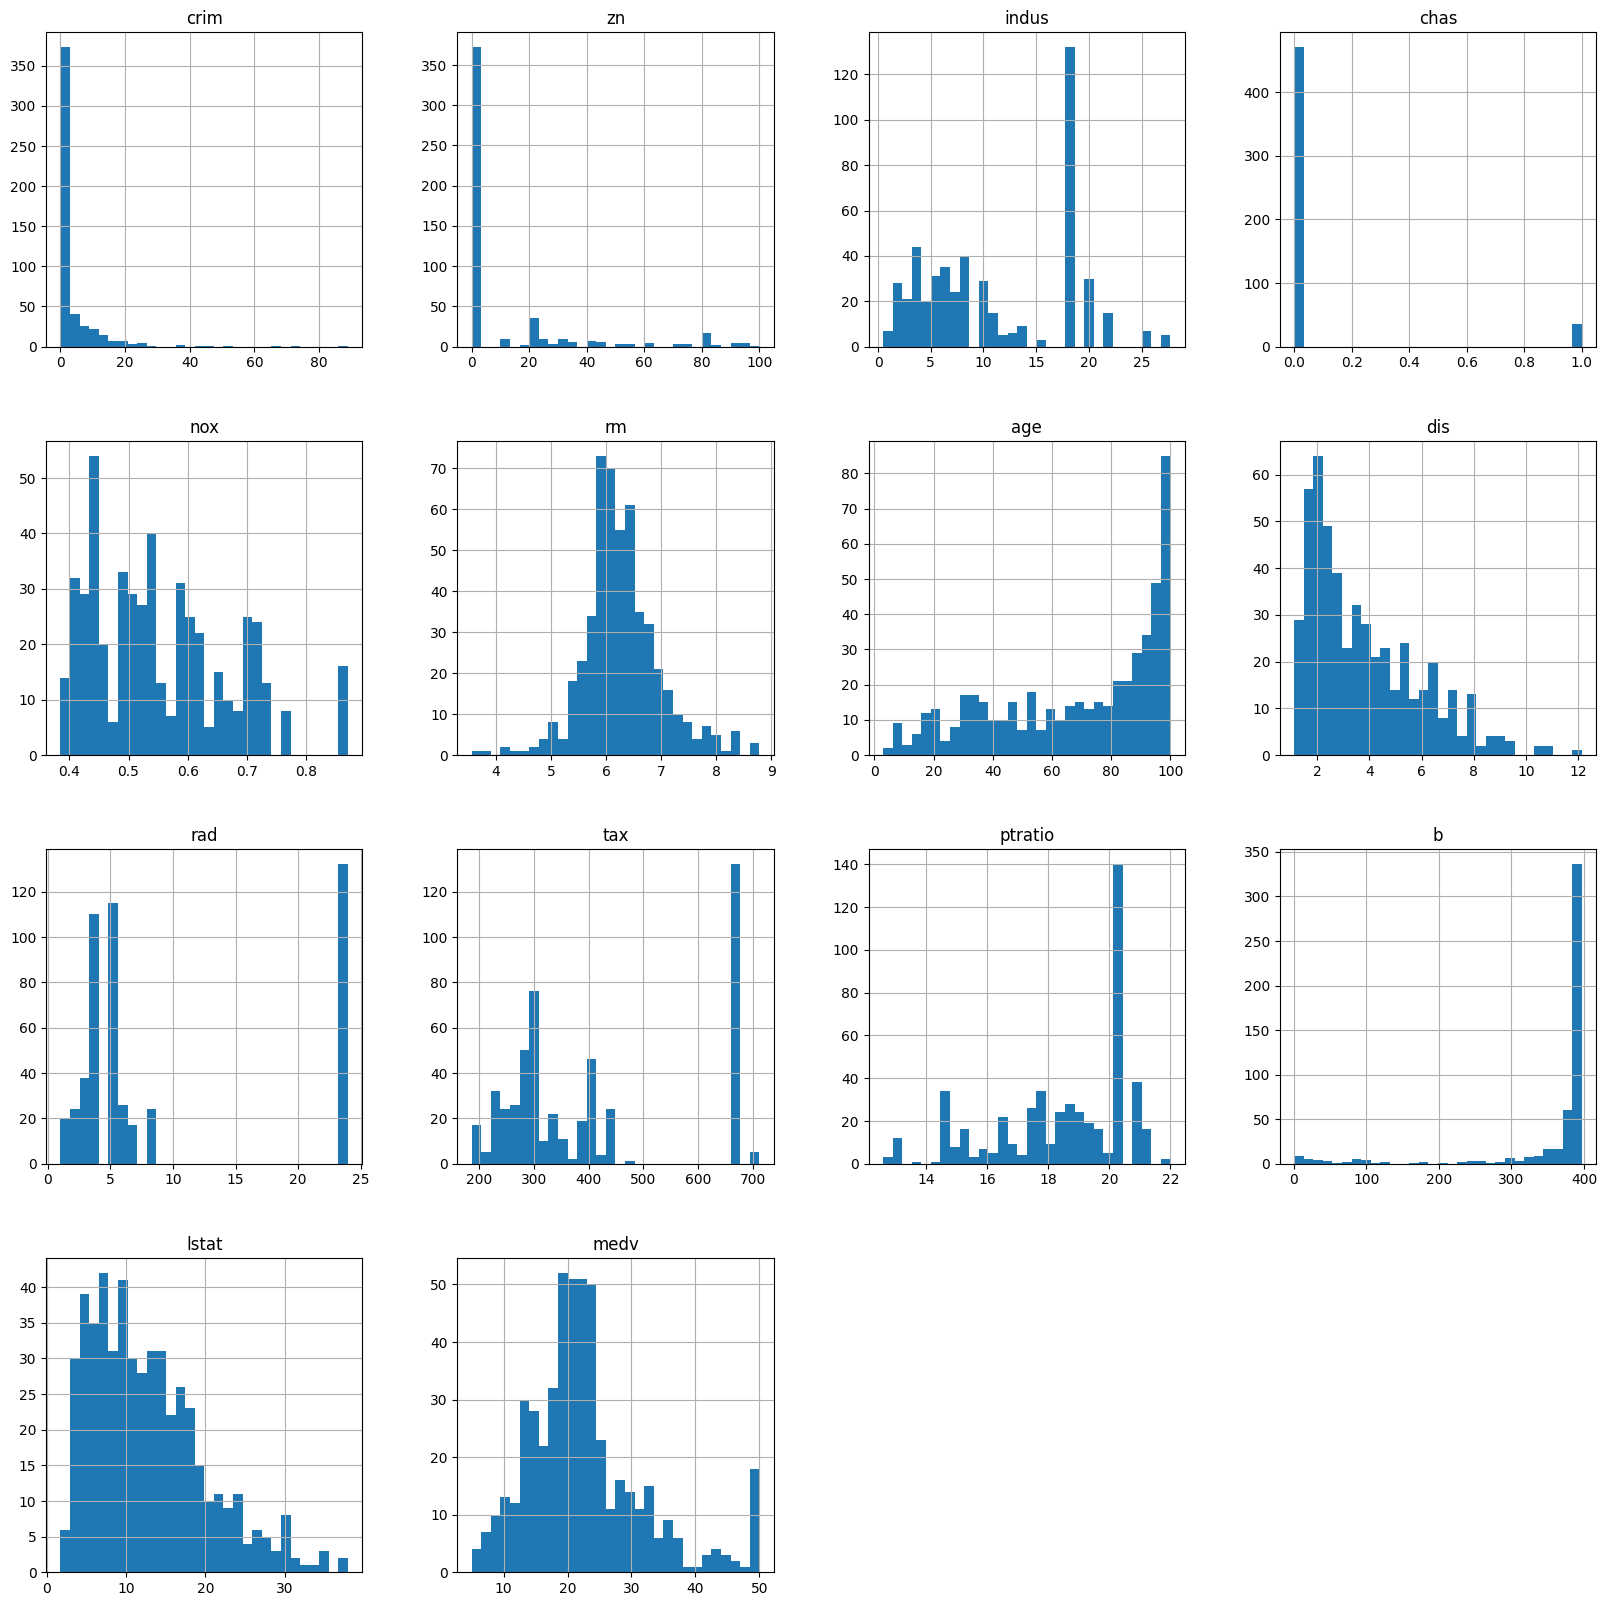

In [32]:

#vamos a ver ahora como se distribuye cada una de las variables de nuestro dataset para intentar de obtener insights
casas.hist(figsize= (20,20), bins=30)

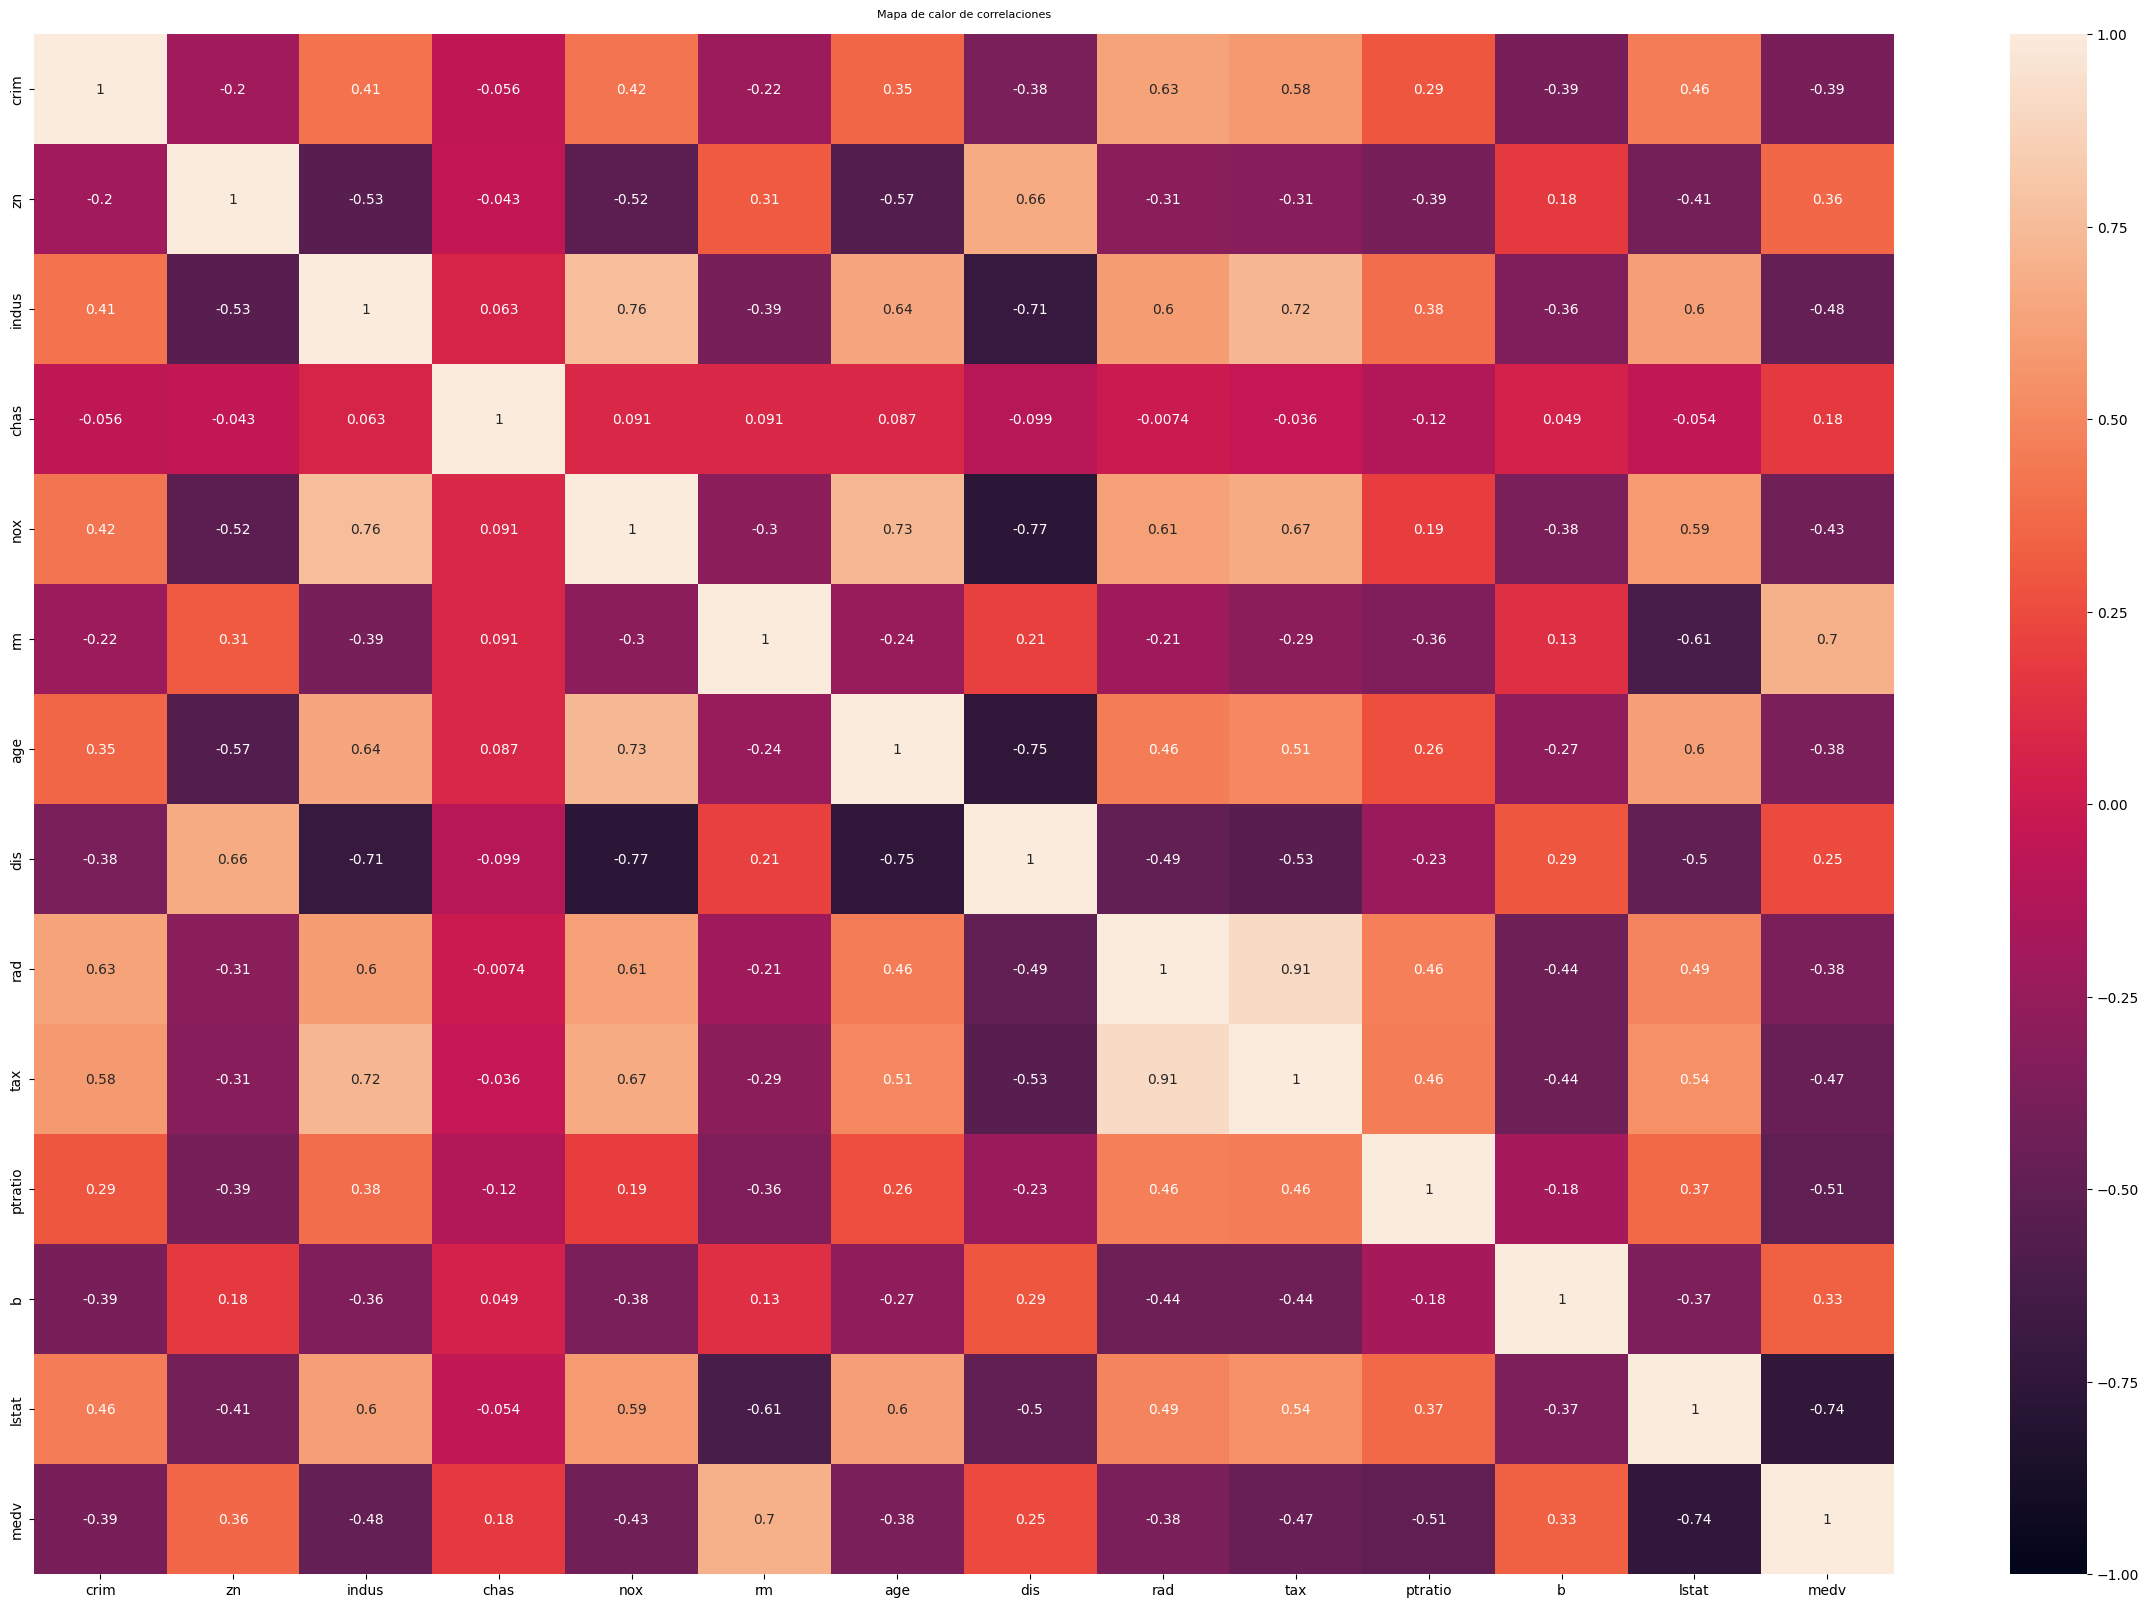

In [35]:
# Generamos la Matriz de correlaciones
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(casas.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Mapa de calor de correlaciones', fontdict={'fontsize':8}, pad=12);

las mayores correlaciones parecen darse entre el precio de la vivienda vs cantidad de habitaciones y precio de la vivienda vs estatus social de la poblacion

Intentaremos entonces de predecir el precio de una vivienda en relacion a la cantidad de habitaciones de la misma, podemos obserbar bastantes datos atipicos en la grafica asi que vamos a tener que realizar una limpieza de datos para poder realizar un correcto modelado.

In [9]:
from sklearn.model_selection import train_test_split
lr =linear_model.LinearRegression() #definimos el algoritmo
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)# separo los datos de entrenamiento y de prueba
#entrenamos el modelo
lr.fit(X_train, y_train)

In [12]:
Y_pred = lr.predict(X_test) 

Text(0, 0.5, 'precio de la casa')

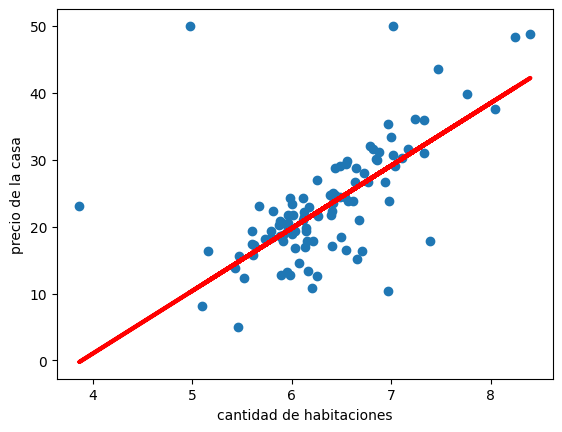

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test,Y_pred,color='red',linewidth=3)
plt.xlabel('cantidad de habitaciones')
plt.ylabel('precio de la casa')

loa linea rojo es lo que representa nuestro modelo, y los punto azules son los valores con los cuales entrenamos nuestro modelo

podemos observar que existen bastantes datos atipicos, esto

In [23]:
print('el valor de la pendiente (coeficiente "a") es igual a ',lr.coef_)
print('y el valor de la interseccion con el eje Y o coeficiente b es igual a ',lr.intercept_)
print('entonces la ecuacion del modelo va a ser: y= ',lr.coef_,"x ",lr.intercept_)

el valor de la pendiente (coeficiente "a") es igual a  [[9.35896877]]
y el valor de la interseccion con el eje Y o coeficiente b es igual a  [-36.37556501]
entonces la ecuacion del modelo va a ser: y=  [[9.35896877]] x  [-36.37556501]


In [24]:
#la presicion del modelo va a ser:
lr.score(X_train,y_train)

0.5067396198780427

###Calculamos los errores del modelo

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = mean_squared_error(y_test, Y_pred, squared=False)
r2 = r2_score(y_test, Y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 4.16140141473132
MSE: 47.39994178443763
RMSE: 6.884761563368599
R²: 0.3680739542640056
